(2048, 1024)


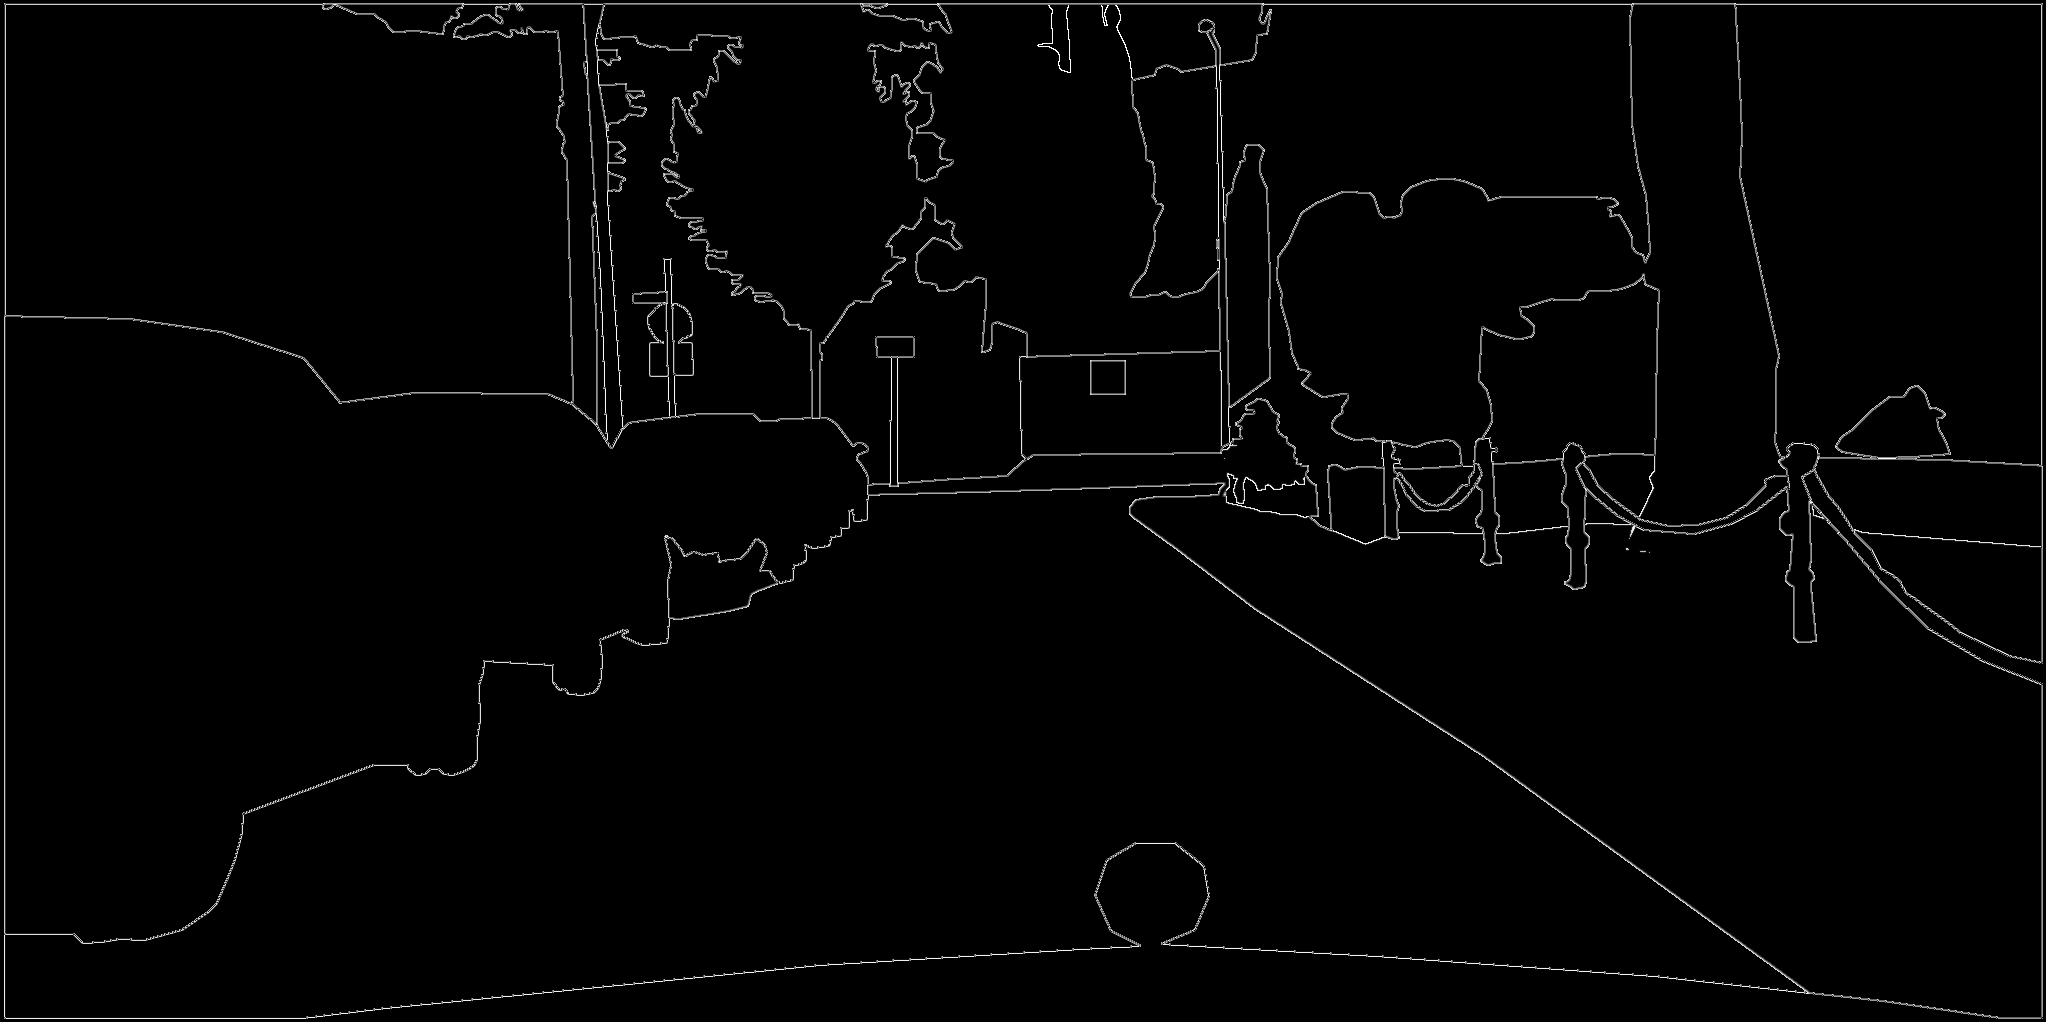

In [24]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage,Grayscale
from torch.nn import functional as F
from torch import nn
import torch
from torchvision import utils as vutils
to_tensor = ToTensor() # img -> tensor
to_pil = ToPILImage()
lena = Image.open('/xiaoou/my_last_project/dataset/cityscapes/gtFine/train/aachen/aachen_000096_000019_gtFine_color.png')
trans =Grayscale(num_output_channels=1)
lena = trans(lena)
input = to_tensor(lena).unsqueeze(0)
conv = nn.Conv2d(1, 1, (3, 3), 1, bias=False)
laplacian_kernel = torch.tensor(
        [-1, -1, -1, -1, 8, -1, -1, -1, -1],
        dtype=torch.float32, device=torch.device('cpu')).reshape(1, 1, 3, 3)
conv.weight.data = laplacian_kernel
print(lena.size)

out = conv(input)
to_pil(out.data.squeeze(0))
# vutils.save_image(out, "lapulasi.jpg")
# aachen_000096_000019_gtFine_color.png
# my_last_project/dataset/cityscapes/gtFine/train/aachen

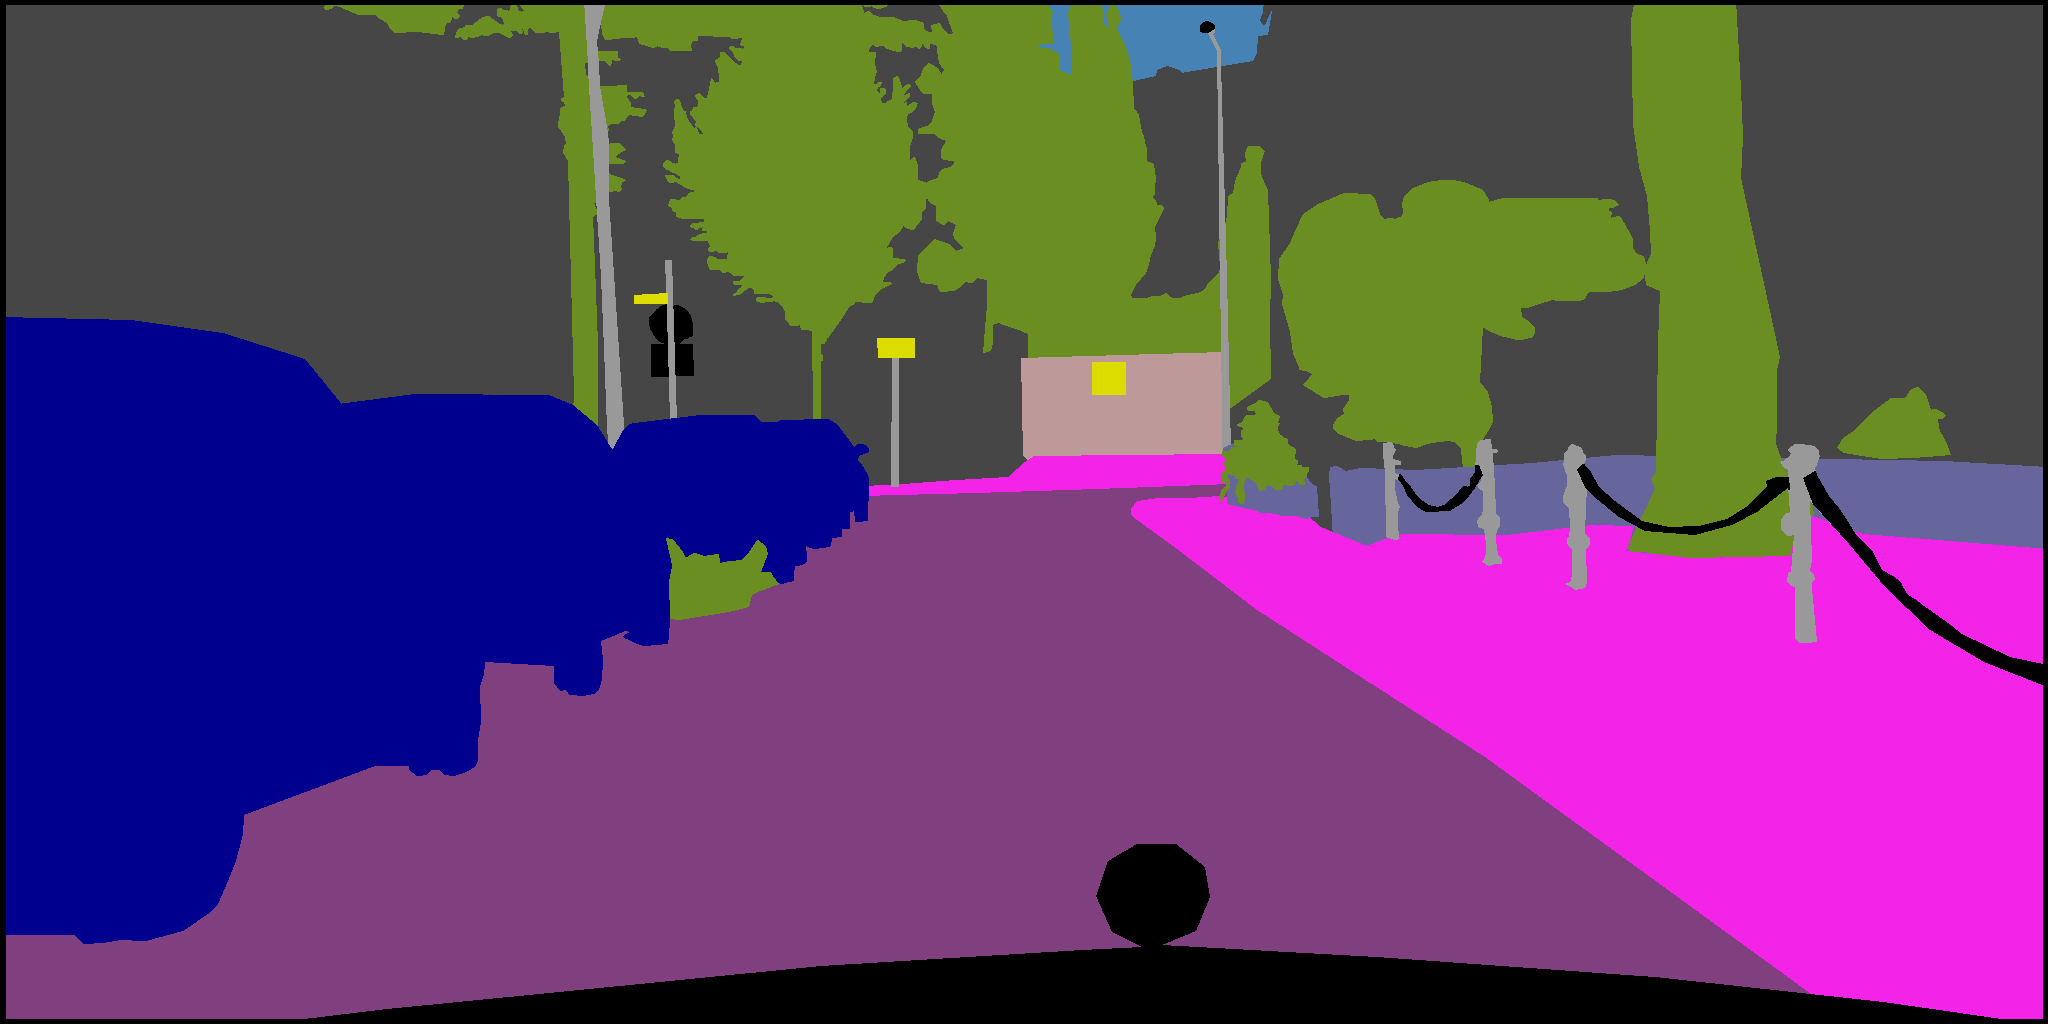

In [12]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage,Grayscale
from torch.nn import functional as F
from torch import nn
import torch
to_tensor = ToTensor() # img -> tensor
to_pil = ToPILImage()
lena_ori = Image.open('/xiaoou/my_last_project/dataset/cityscapes/gtFine/train/aachen/aachen_000096_000019_gtFine_color.png')
lena_ori

(2048, 1024)


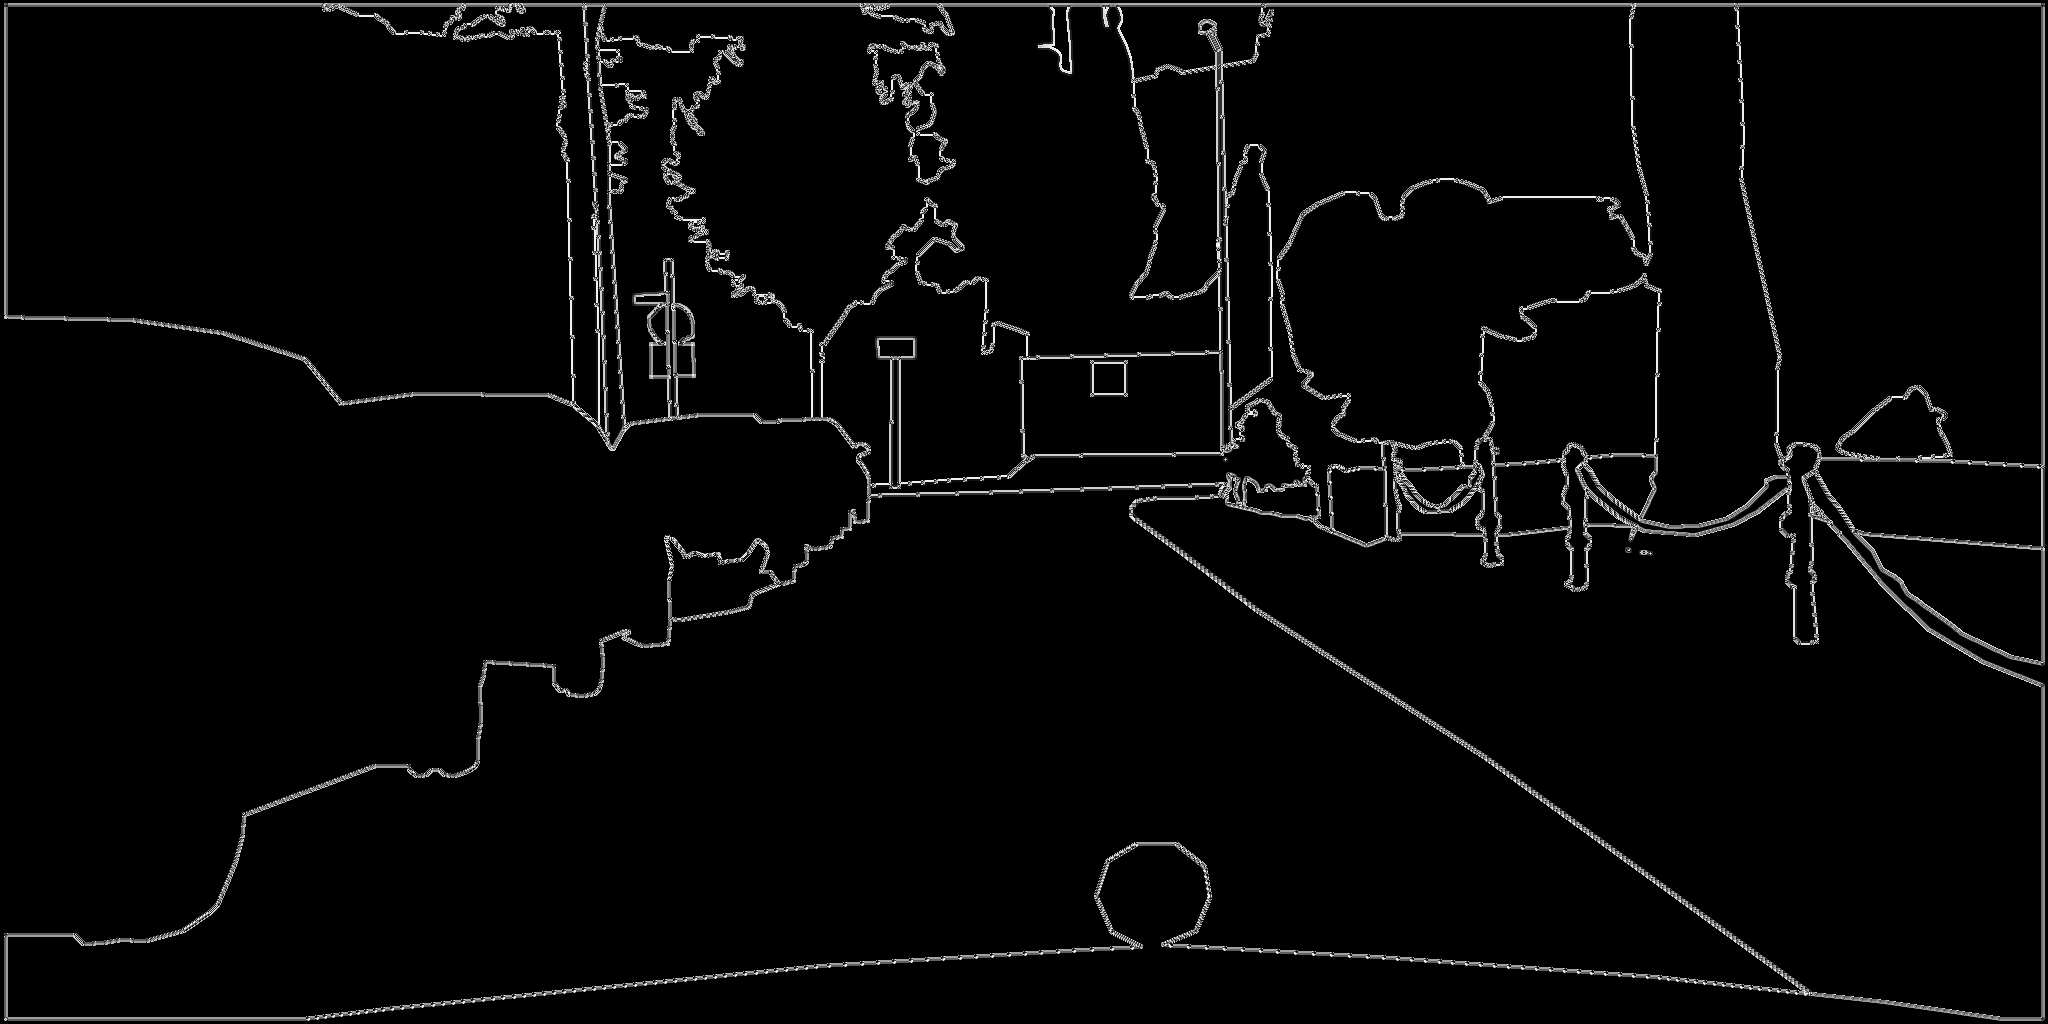

In [13]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage,Grayscale
from torch.nn import functional as F
from torch import nn
import torch
to_tensor = ToTensor() # img -> tensor
to_pil = ToPILImage()
lena_process = Image.open('/xiaoou/my_last_project/dataset/cityscapes/gtFine/train/aachen/aachen_000096_000019_gtFine_color.png')
trans =Grayscale(num_output_channels=1)
lena_process = trans(lena_process)
input = to_tensor(lena_process).unsqueeze(0)
conv = nn.Conv2d(1, 1, (5, 5), 1, 2,bias=False)
laplacian_kernel = torch.tensor(
        [-2, -4, -4, -4, -2, -4, 0, 8, 0,-4,-4,8,24,8,-4,-4,0,8,0,-4,-2,-4,-4,-4,-2],
        dtype=torch.float32, device=torch.device('cpu')).reshape(1, 1, 5, 5)
conv.weight.data = laplacian_kernel
print(lena_process.size)

out = conv(input)
# lena_process
to_pil(out.data.squeeze(0))
# from torchvision import utils as vutils
# vutils.save_image(out, "lapulasi_proc.jpg")

In [31]:
import torch
from torch.nn import functional as F
 
"""手动定义卷积核(weight)和偏置"""
w = torch.rand(16, 3, 5, 5)  # 16种3通道的5乘5卷积核
b = torch.rand(16)  # 和卷积核种类数保持一致(不同通道共用一个bias)
 
"""定义输入样本"""
x = torch.randn(1, 3, 28, 28)  # 1张3通道的28乘28的图像
 
"""2D卷积得到输出"""
out = F.conv2d(x, w, b, stride=1, padding=1)  # 步长为1,外加1圈padding,即上下左右各补了1圈的0,
print(out.shape)
 
out = F.conv2d(x, w, b, stride=2, padding=2)  # 步长为2,外加2圈padding
print(out.shape)
out = F.conv2d(x, w)  # 步长为1,默认不padding, 不够的舍弃，所以对于28*28的图片来说，算完之后变成了24*24
print(out.shape)
 

torch.Size([1, 16, 26, 26])
torch.Size([1, 16, 14, 14])
torch.Size([1, 16, 24, 24])


In [1]:
from torchsummary import summary
from model_stages import BiSeNet
models_b = BiSeNet('STDCNet1446',19)
# summary(models_b, input_size=(3, 768, 1536))

/xiaoou/STDC-Seg-master/STDC-Seg-master/model_stages.py:129: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(self.W.weight, 0)
/xiaoou/STDC-Seg-master/STDC-Seg-master/model_stages.py:130: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(self.W.bias, 0)


In [2]:
from ptflops import get_model_complexity_info
from torchvision import models

ops, params = get_model_complexity_info(models_b, (3, 768, 1536), as_strings=True, print_per_layer_stat=True, verbose=True)


BiSeNet(
  22.168 M, 157.325% Params, 84.185 GMac, 100.000% MACs, 
  (cp): ContextPath(
    20.791 M, 147.556% Params, 57.039 GMac, 67.755% MACs, 
    (backbone): STDCNet1446(
      19.28 M, 136.830% Params, 50.163 GMac, 59.587% MACs, 
      (features): Sequential(
        8.077 M, 57.325% Params, 25.082 GMac, 29.794% MACs, 
        (0): ConvX(
          0.001 M, 0.007% Params, 0.283 GMac, 0.336% MACs, 
          (conv): Conv2d(0.001 M, 0.006% Params, 0.255 GMac, 0.303% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(0.0 M, 0.000% Params, 0.019 GMac, 0.022% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(0.0 M, 0.000% Params, 0.009 GMac, 0.011% MACs, inplace=True)
        )
        (1): ConvX(
          0.019 M, 0.132% Params, 1.373 GMac, 1.631% MACs, 
          (conv): Conv2d(0.018 M, 0.131% Params, 1.359 GMac, 1.614% MACs, 32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1),

In [18]:
pip install ptflops

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for ptflops: filename=ptflops-0.6.6-cp36-none-any.whl size=8905 sha256=319a32a03cb40e400c6b06f3004265e4f3a9f70b670d34ffeebe8d5d1b5d526f
  Stored in directory: /tmp/pip-ephem-wheel-cache-irg8mzp4/wheels/3b/54/06/52c33a29f6b47010756bb1f8978942d0c53b807dede3ccc02a
Successfully built ptflops
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Image方法的结果如下：
大小：(796, 863)
类型：<class 'numpy.ndarray'>
[[177. 177. 178. ... 185. 185. 184.]
 [178. 178. 179. ... 185. 186. 186.]
 [179. 179. 180. ... 185. 186. 186.]
 ...
 [201. 200. 200. ... 125. 146. 148.]
 [201. 200. 200. ... 129. 146. 147.]
 [201. 200. 200. ... 128. 145. 146.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


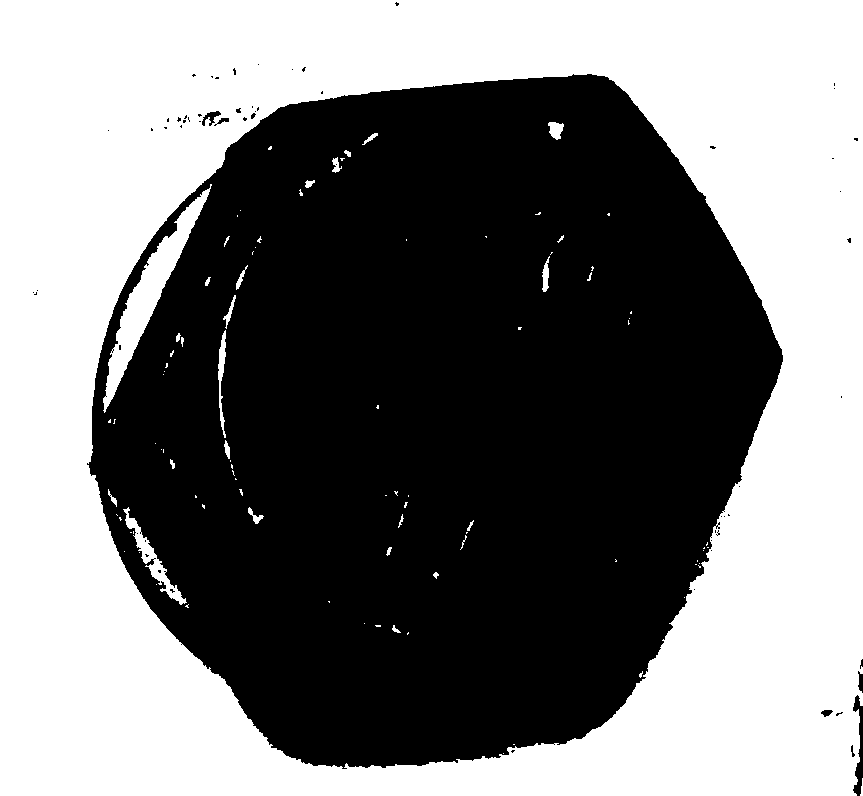

In [40]:
import numpy as np
img = np.array(Image.open('/xiaoou/STDC-Seg-master/STDC-Seg-master/43.jpg').convert('L'), 'f') #读取图片，灰度化，转换为数组，L = 0.299R + 0.587G + 0.114B。'f'为float类型
print("Image方法的结果如下：")
print('大小：{}'.format(img.shape))
print("类型：%s" % type(img))
print(img)
for i in range(len(img)):
    for j in range(len(img[i])):
        if(img[i][j]/255>0.5):
            img[i][j] = 1
        else:
            img[i][j] = 0
print(img)
input = to_tensor(img).unsqueeze(0)
# print(input)
conv = nn.Conv2d(1, 1, (5, 5), 1, 2,bias=False)
laplacian_kernel = torch.tensor(
        [-2, -4, -4, -4, -2, -4, 0, 8, 0,-4,-4,8,24,8,-4,-4,0,8,0,-4,-2,-4,-4,-4,-2],
        dtype=torch.float32, device=torch.device('cpu')).reshape(1, 1, 5, 5)
conv.weight.data = laplacian_kernel
# print(lena_process.size)

out = conv(input)
# lena_process
to_pil(input.data.squeeze(0))

Image方法的结果如下：
大小：(1024, 2048)
类型：<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
